## Alessandro Bianchetti

## Exercise 7

Consider a bivariate Gaussian distribution N($\mu$,$\Sigma$), where $\mu$ = (4, 2),
$\Sigma_{11}$ = 1.44, $\Sigma_{22}$ = 0.81, $\Sigma_{12}$ = $\Sigma_{12}$ = −0.702. Assume that such distribution
describes the posterior of two parameters $X_1$ and $X_2$. Plot contours
of this distribution and tell what are the boundaries of the 95\% credibile
interval for each parameter, after marginalizing over the other. Tell how
these boundaries change if, instead of marginalizing, we fix either parameter
to a known value. Now, re-obtain the same boundaries via Monte
Carlo sampling of the posterior, in three ways: a) by directly drawing values
of ($X_1$,$X_2$), by mean of a a Cholesky decomposition of the covariance
(check in the literature how to do this); b) Via Metropolis-Hastings sampling
of the posterior, c) Via Gibbs sampling of the posterior. In all cases,
do not rely on pre-made code, but write your own (i.e., you can surely
use libraries to generate known distributions, do Cholesky decomposition,
and so on, but you should not use a pre-made library with a command like
”Gibbs-sampling”). In all cases, provide final contour plots, and marginalized
posteriors. In the MCMC analysis, produce also trace plots to test
for convergence of the chains. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from numpy.random import random, seed
from scipy.stats import multivariate_normal as mvn
import scipy.integrate as integrate

#plt.rcParams['axes.xmargin'] = 0
#plt.rcParams['axes.ymargin'] = 0
%matplotlib inline

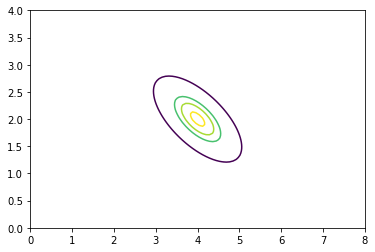

In [2]:
D = int(2)
x = np.random.rand(D)
mu = np.array([4,2],float)
cov = np.array([[1.44,-0.702],[-0.702,0.81]])
det = cov[0,0]*cov[1,1]-cov[0,1]**2
# random symmetric matrix
#cov = A.T.dot(A)

# Generate grid points
x, y = np.meshgrid(np.linspace(0,8,100),np.linspace(0,4,100))
xy = np.column_stack([x.flat, y.flat])

# density values at the grid points
z = mvn.pdf(xy, mu, cov).reshape(x.shape)

# arbitrary contour levels
max = 0.19371
contour_level = [0.68*max,0.9*max,0.95*max,0.99*max]

fig = plt.contour(x, y, z, levels = contour_level)
plt.show()

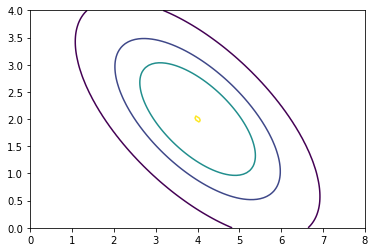

In [3]:
contour_level = [0.01,0.05,0.1,0.1935]

fig = plt.contour(x, y, z, levels = contour_level)
plt.show()


Firs step: we marginalize the original BVN over X to get the posterior for Y: we use scipy.quad to loop over that integral until we find the correct interval.


In [4]:
def funcy(y):
    c = 1./(np.sqrt(2*np.pi))*np.sqrt(det/cov[1,1])*np.e**(-0.5*(y-mu[1])**2*cov[0,0]/det + cov[0,1]**2/cov[1,1])
    return c

interval_y = [-1000, 1000]
Itot = integrate.quad(funcy, interval_y[0], interval_y[1], epsrel=1.e-14)
print(Itot)

eps=1.e-5
interval_y = [mu[1]-eps, mu[1]+eps]
I=[0,0]

alpha = Itot[0]*0.95
#print(alpha)
while(I[0]<alpha): 
    I = integrate.quad(funcy, interval_y[0], interval_y[1], epsrel=1.e-9)
    interval_y[0] -= eps
    interval_y[1] += eps
    #print(X1,X2)
    #print("ok")

print(I)
print(interval_y)

#I = integrate.quad(func, 3.99999, 4.00001, epsrel=1.2-14)
#print(I)

(1.1460419286179722, 3.6175566598378226e-10)
(1.0887399673551021, 1.1997757038481783e-11)
[0.6594899999949986, 3.340510000008782]


We repeat the same procedure for Y, thus getting the posterior for X and extracting the credibility interval in X.

In [20]:
def funcx(x):
    c = 1./(np.sqrt(2*np.pi))*np.sqrt(det/cov[0,0])*np.e**(-0.5*(x-mu[0])**2*cov[1,1]/det + cov[0,1]**2/cov[0,0])
    return c

interval_x = [-1000, 1000]
Itot = integrate.quad(funcx, interval_x[0], interval_x[1], epsrel=1.e-14)
print(Itot)
alpha = Itot[0]*0.95

eps=1.e-5
interval_x = [mu[0]-eps, mu[0]+eps]
I=[0,0]

while(I[0]<alpha): 
    I = integrate.quad(funcx, interval_x[0], interval_x[1], epsrel=1.e-9)
    interval_x[0] -= eps
    interval_x[1] += eps
    #print(X1,X2)
    #print("ok")

print(I)
print(interval_x)

(0.8782126128924519, 9.848225467762317e-09)
(0.8343020159159318, 9.187718572007952e-12)
[2.212699999988291, 5.787299999932337]


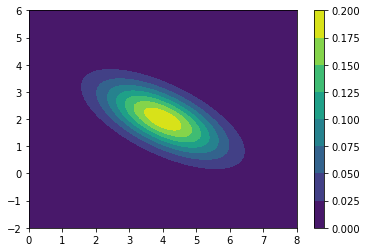

In [19]:
N = int(100)
xvec = np.linspace(0,8,N)
yvec = np.linspace(-2,6,N)
x, y = np.meshgrid(xvec,yvec)
#xy = np.column_stack([x.flat, y.flat])
xy = np.dstack((x, y))
rv = mvn(mu, cov)
z = rv.pdf(xy)

cs = plt.contourf(x, y, z, cmap="viridis")
cbar = plt.colorbar(cs, orientation="vertical")

#print(rv.pdf(xy))

plt.tight_layout
plt.show()

An alternative path could be projecting the above 2d histogram on either axis: that corresponds to the marginalization process. We would get a univariate Gaussian, for which we can calculate the credibility interval. We do this for y, then for x.

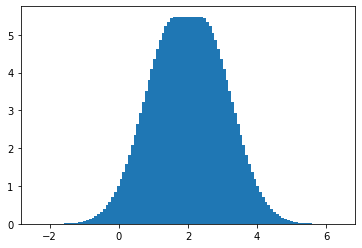

11.647284897986694 11.629809286567662
26 72
0.10101010101010122 3.8181818181818183


In [18]:
marg_post_y = np.zeros(N, float)
for i in range(N):
    for j in range(N):
        marg_post_y[i] += z[i,j]

plt.bar(yvec,marg_post_y)
plt.show()

bin_width = 8./100
I = sum(marg_post_y)*bin_width
alpha = 0.95*I 
peak = np.max(marg_post_y)
ind = np.argmax(marg_post_y)

ind1 = ind-1
ind2 = ind+1
I0=0
while(I0<alpha): 
    I0=0
    for j in range(ind1,ind2):
        I0 += marg_post_y[j]*bin_width
    ind1 -=1
    ind2 +=1
    
    

print(I0, alpha)
print(ind1,ind2)
print(yvec[ind1],yvec[ind2])
    

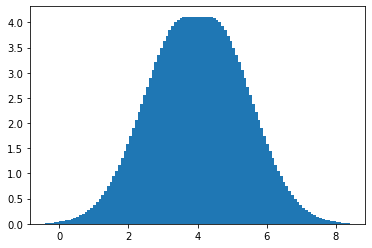

11.714663233091692 11.629809286567665
18 80
1.4545454545454546 6.464646464646465


In [17]:
marg_post_x = np.zeros(N, float)
for i in range(N):
    for j in range(N):
        marg_post_x[i] += z[j,i]

plt.bar(xvec,marg_post_x)
plt.show()

bin_width = 8./100
I = sum(marg_post_x)*bin_width
alpha = 0.95*I 
peak = np.max(marg_post_x)
ind = np.argmax(marg_post_x)

ind1 = ind-1
ind2 = ind+1
I0=0
while(I0<alpha): 
    I0=0
    for j in range(ind1,ind2):
        I0 += marg_post_x[j]*bin_width
    ind1 -=1
    ind2 +=1
    
    

print(I0, alpha)
print(ind1,ind2)
print(xvec[ind1],xvec[ind2])
        

Next step is computing the credibnility interval after fixing either parameter, instead of marginalizing over it. We take the BVN and just fix the parameters equal to their mean value, one at a time.

In [21]:
def UVNx(x):
    c = 1./(2*np.pi)*1./det*np.e**(-0.5*(x-mu[0])**2/cov[0,0])
    return c

interval_x = [-1000, 1000]
Itot = integrate.quad(UVNx, interval_x[0], interval_x[1], epsrel=1.e-7)
print(Itot)
alpha = Itot[0]*0.95

eps=1.e-5
interval_x = [mu[0]-eps, mu[0]+eps]
I=[0,0]

while(I[0]<alpha): 
    I = integrate.quad(UVNx, interval_x[0], interval_x[1], epsrel=1.e-9)
    interval_x[0] -= eps
    interval_x[1] += eps
    #print(X1,X2)
    #print("ok")

print(I)
print(interval_x)

(0.7107089954241402, 8.518387707977135e-10)
(0.6751737684671284, 7.44050046641647e-12)
[1.6480299999845918, 6.35196999991096]


In [22]:
def UVNy(y):
    c = 1./(2*np.pi)*1./det*np.e**(-0.5*(y-mu[1])**2/cov[1,1])
    return c

interval_y = [-1000, 1000]
Itot = integrate.quad(UVNy, interval_y[0], interval_y[1], epsrel=1.e-7)
print(Itot)
alpha = Itot[0]*0.95

eps=1.e-5
interval_y = [mu[1]-eps, mu[1]+eps]
I=[0,0]

while(I[0]<alpha): 
    I = integrate.quad(UVNy, interval_y[0], interval_y[1], epsrel=1.e-9)
    interval_y[0] -= eps
    interval_y[1] += eps
    #print(X1,X2)
    #print("ok")

print(I)
print(interval_y)

(0.5330317465681051, 1.0315480387313826e-10)
(0.506380326352815, 5.580384083242995e-12)
[0.23601999999546036, 3.763980000011556]
